In [1]:
###################
# Import Libraries
###################

import pandas as pd # coding but excel
import numpy as np # number stuff, creates arrays
import matplotlib.pyplot as plt # plotting
from scipy.optimize import curve_fit # curve fit class

In [3]:
##############
# Import data
##############

df_SE = pd.read_csv("LBL20250314_105511.csv") # create pandas dataframe
print(df_SE.head()) # print first 5 rows

   Time(ms)  Angle(rad)     Volume  Pressure(kPa)  Temperature 1(C)  \
0       0.0    2.259554  31.363800      90.278320             196.0   
1       7.0    1.690447  33.980470      82.075195             196.0   
2      11.0    1.363709  35.925614      77.717285             196.0   
3      15.0    1.036971  37.948394      73.957520             196.0   
4      20.0    0.711767  39.748905      70.661621             196.0   

   Temperature 2(C)  
0             62.25  
1             62.25  
2             62.25  
3             62.25  
4             62.25  


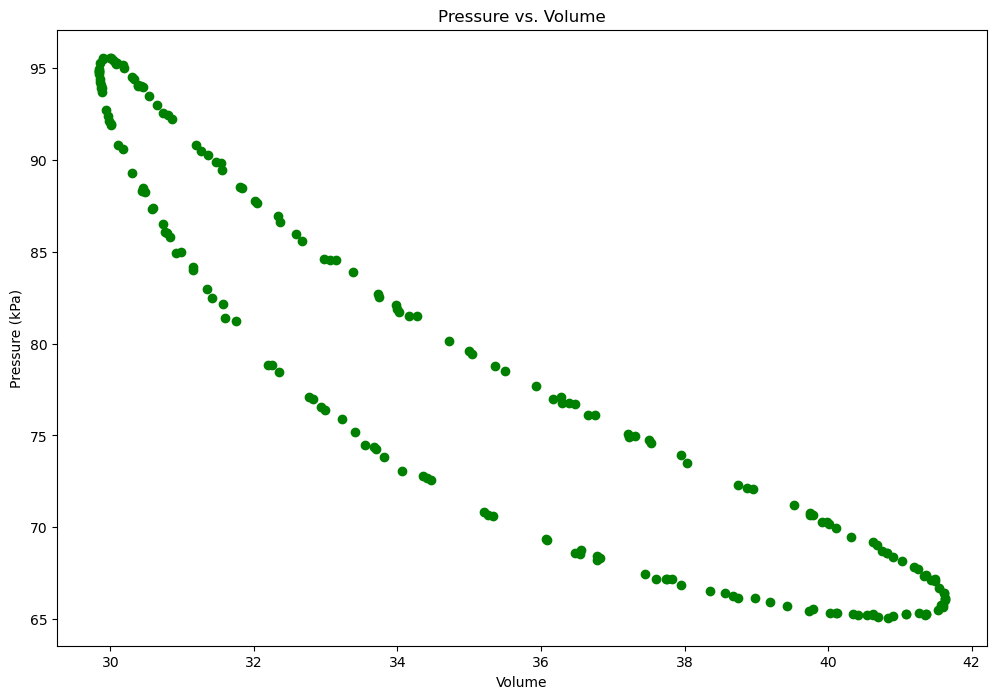

In [11]:
P = df_SE["Pressure(kPa)"]
V = df_SE["Volume"]


############
# Plot data
############

plt.figure(figsize=(12,8))
plt.xlabel("Volume")
plt.ylabel("Pressure (kPa)")
plt.title("Pressure vs. Volume")
plt.scatter(V, P, c='g')
plt.show()

Average Hot T: 196.1275,
Average Cold T: 62.25


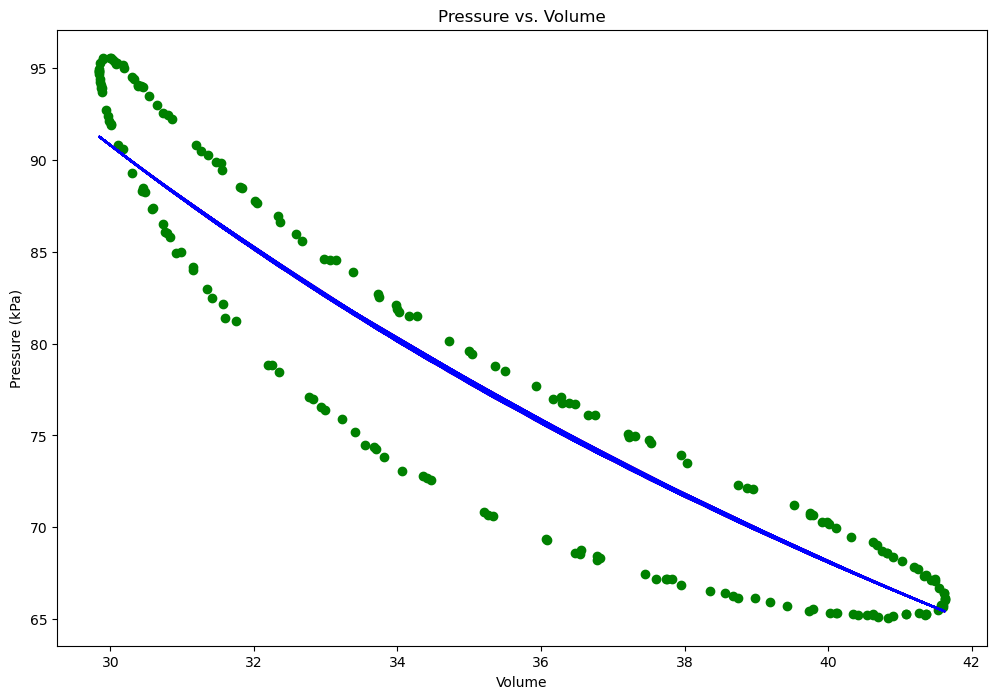

In [16]:
n = 0.5
R = 8.31
T_hot = np.average(df_SE["Temperature 1(C)"])
T_cold = np.average(df_SE["Temperature 2(C)"])
print(f'Average Hot T: {T_hot},\nAverage Cold T: {T_cold}')

def PV_Hot(V, R, n):
    P = (n*R*T_hot) / V
    return P


def PV_Cold(V, R, n):
    P = (n*R*T_cold) / V
    return P


PV_Hot_popt, PV_Hot_pcov = curve_fit(PV_Hot, V, P, p0=[R:=8, n:=0.0024])
y_hotFit = PV_Hot(V, *PV_Hot_popt)

PV_Cold_popt, PV_Cold_pcov = curve_fit(PV_Cold, V, P, p0=[R:=8, n:=0.0024])
y_coldFit = PV_Cold(V, *PV_Cold_popt)


############
# Plot data
############

plt.figure(figsize=(12,8))
plt.xlabel("Volume")
plt.ylabel("Pressure (kPa)")
plt.title("Pressure vs. Volume")
plt.scatter(V, P, c='g')
plt.plot(V, y_hotFit, c='r') # Fit function - Hot
plt.plot(V, y_coldFit, c='b') # Fit function - Cold
plt.show()